<a href="https://colab.research.google.com/github/Gumm11/Recommendation/blob/main/Bali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn scikit-learn hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 36.4 MB/s eta 0:00:00


In [4]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import hdbscan
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import random

# Bersih-bersih Data

In [5]:
df = pd.read_csv('data/bali.csv')
df.head()

,keyword,Title,Reviews,Review_points,Address,Country,City,State,Website,Phone,...,Open_Time_Friday,Open_Time_Saturday,Open_Time_Sunday,Popular_times_Monday,Popular_times_Tuesday,Popular_times_Wednesday,Popular_times_Thursday,Popular_times_Friday,Popular_times_Saturday,Popular_times_Sunday
0,Things to do in Bali,Ulun Danu Beratan Temple,43605,4.6,"Danau Beratan, Candikuning, Baturiti, Tabanan ...",ID,Tabanan Regency,Bali,https://ulundanuberatan.com/,+62 821-4612-9292,...,Friday 7 AM–7 PM 2024-11-29,Saturday 7 AM–7 PM 2024-11-23,Sunday 7 AM–7 PM 2024-11-24,0% busy at 6 AM;5% busy at 7 AM;11% busy at 8 ...,0% busy at 6 AM;6% busy at 7 AM;14% busy at 8 ...,0% busy at 6 AM;6% busy at 7 AM;14% busy at 8 ...,0% busy at 6 AM;6% busy at 7 AM;13% busy at 8 ...,0% busy at 6 AM;10% busy at 7 AM;17% busy at 8...,0% busy at 6 AM;8% busy at 7 AM;16% busy at 8 ...,0% busy at 6 AM;9% busy at 7 AM;18% busy at 8 ...
1,Things to do in Bali,Tanah Lot,95062,4.6,"Beraban, Kediri, Tabanan Regency, Bali 82121, ...",ID,Tabanan Regency,Bali,https://www.tanahlot.id/,+62 361 880361,...,Friday 6 AM–7 PM 2024-11-29,Saturday 6 AM–7 PM 2024-11-23,Sunday 6 AM–7 PM 2024-11-24,0% busy at 5 AM;9% busy at 6 AM;15% busy at 7 ...,0% busy at 5 AM;11% busy at 6 AM;23% busy at 7...,0% busy at 5 AM;10% busy at 6 AM;18% busy at 7...,0% busy at 5 AM;6% busy at 6 AM;17% busy at 7 ...,0% busy at 5 AM;8% busy at 6 AM;18% busy at 7 ...,0% busy at 5 AM;10% busy at 6 AM;26% busy at 7...,0% busy at 5 AM;11% busy at 6 AM;25% busy at 7...
2,Things to do in Bali,Sacred Monkey Forest Sanctuary,49737,4.5,"Jl. Monkey Forest, Ubud, Kecamatan Ubud, Kabup...",ID,Gianyar Regency,Bali,http://www.monkeyforestubud.com/,+62 361 971304,...,Friday 9 AM–5 PM 2024-11-29,Saturday 9 AM–5 PM 2024-11-23,Sunday 9 AM–5 PM 2024-11-24,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...
3,Things to do in Bali,Campuhan Ridge Walk,13376,4.3,"Kelusa, Payangan, Jl. Raya Campuhan, Sayan, Ke...",ID,Gianyar Regency,Bali,NaN,NaN,...,Friday Open 24 hours 2024-11-29,Saturday Open 24 hours 2024-11-23,Sunday Open 24 hours 2024-11-24,7% busy at 4 AM;9% busy at 5 AM;13% busy at 6 ...,3% busy at 4 AM;6% busy at 5 AM;10% busy at 6 ...,3% busy at 4 AM;7% busy at 5 AM;13% busy at 6 ...,3% busy at 4 AM;6% busy at 5 AM;13% busy at 6 ...,4% busy at 4 AM;7% busy at 5 AM;13% busy at 6 ...,3% busy at 4 AM;5% busy at 5 AM;12% busy at 6 ...,6% busy at 4 AM;10% busy at 5 AM;17% busy at 6...
4,Things to do in Bali,Pura Tirta Empul,24243,4.6,"Tampaksiring, Gianyar Regency, Bali 80552, Ind...",ID,Gianyar Regency,Bali,NaN,NaN,...,Friday 8 AM–6 PM 2024-11-29,Saturday 8 AM–6 PM 2024-11-23,Sunday 8 AM–6 PM 2024-11-24,0% busy at 6 AM;0% busy at 7 AM;19% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;19% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;21% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;24% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;20% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;24% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;26% busy at 8 ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   keyword                  125 non-null    object 
 1   Title                    125 non-null    object 
 2   Reviews                  125 non-null    int64  
 3   Review_points            125 non-null    float64
 4   Address                  125 non-null    object 
 5   Country                  125 non-null    object 
 6   City                     125 non-null    object 
 7   State                    125 non-null    object 
 8   Website                  66 non-null     object 
 9   Phone                    83 non-null     object 
 10  Open_Time                125 non-null    object 
 11  Page_URL                 125 non-null    object 
 12  Google_id                125 non-null    object 
 13  Place_id                 125 non-null    object 
 14  Additional_info          2

In [7]:
df = df.dropna(subset=['Reviews', 'City', 'Latitude', 'Longitude'])
df = df[df['State'] == "Bali"]

df = df[['Title', 'Reviews', 'Review_points', 'Latitude', 'Longitude']]

df.head()

,Title,Reviews,Review_points,Latitude,Longitude
0,Ulun Danu Beratan Temple,43605,4.6,-8.275181,115.166823
1,Tanah Lot,95062,4.6,-8.621213,115.086807
2,Sacred Monkey Forest Sanctuary,49737,4.5,-8.519373,115.260630
3,Campuhan Ridge Walk,13376,4.3,-8.503581,115.254758
4,Pura Tirta Empul,24243,4.6,-8.415659,115.315328


In [8]:
df.isnull().sum()

,0
Title,0
Reviews,0
Review_points,0
Latitude,0
Longitude,0


In [9]:
df.duplicated().sum()

0

In [10]:
df['Title'] = df['Title'].astype('category')
df.dtypes

,0
Title,category
Reviews,int64
Review_points,float64
Latitude,float64
Longitude,float64


# Train Model

In [45]:
coords = df[['Latitude', 'Longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

In [59]:
coords_rad = np.radians(coords)

clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1, cluster_selection_epsilon=0.00015)
cluster_labels = clusterer.fit_predict(coords_rad)

df['Cluster'] = cluster_labels

In [60]:
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = (cluster_labels == -1).sum()

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Points per cluster
print(df['Cluster'].value_counts())

Number of clusters: 29
Number of noise points: 16
Cluster
-1     16
 27    14
 23     9
 4      6
 28     6
 24     5
 26     5
 9      5
 7      4
 15     4
 5      4
 16     4
 6      3
 18     3
 25     3
 3      3
 14     3
 17     3
 0      3
 8      2
 13     2
 22     2
 20     2
 19     2
 2      2
 11     2
 12     2
 21     2
 1      2
 10     2
Name: count, dtype: int64


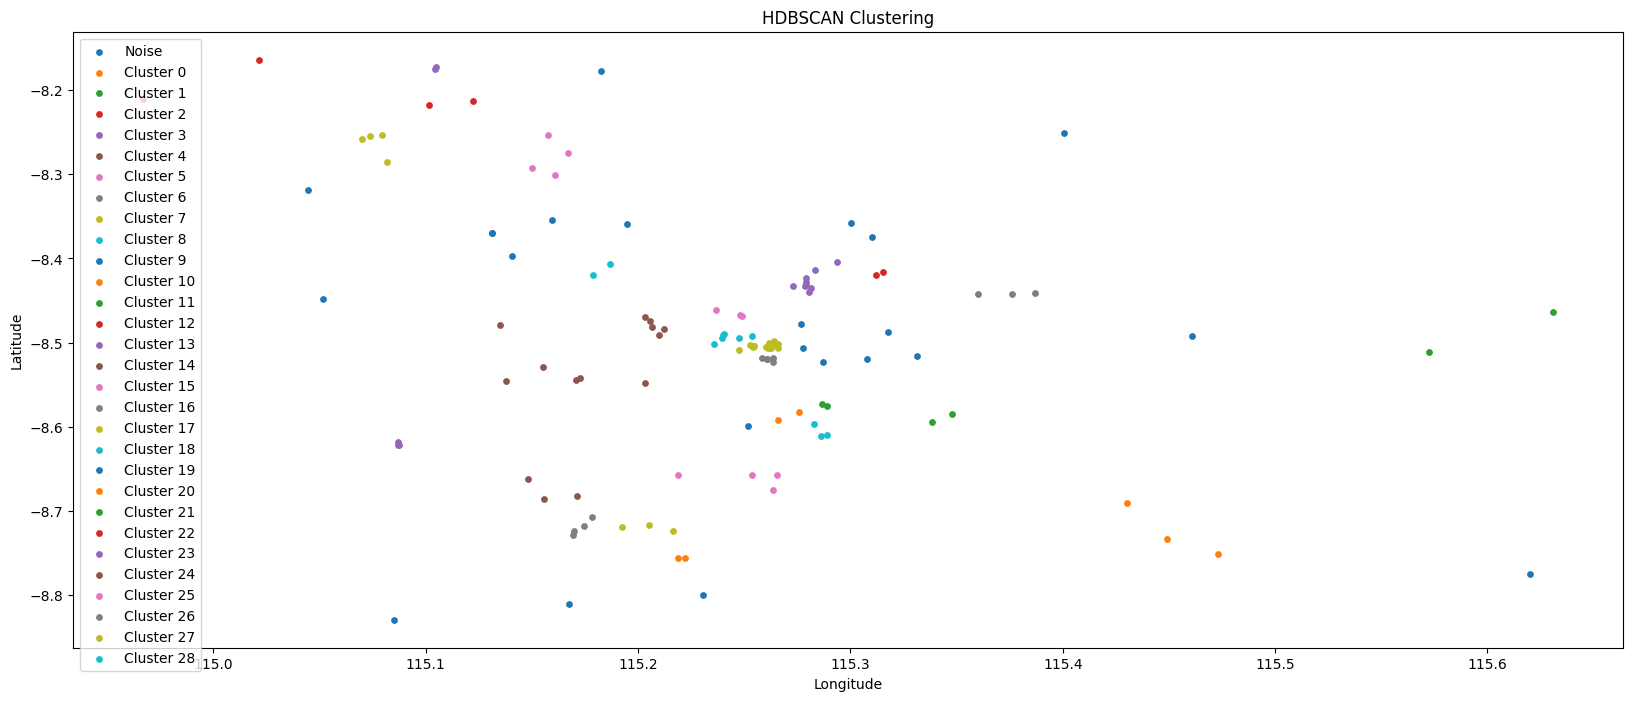

In [61]:
plt.figure(figsize=(20, 8))
for cluster_id in sorted(df['Cluster'].unique()):
    label = f"Cluster {cluster_id}" if cluster_id != -1 else "Noise"
    cluster_points = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_points['Longitude'], cluster_points['Latitude'], label=label, s=15)

plt.title("HDBSCAN Clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [62]:
clusters = {}
for cluster_id in sorted(df['Cluster'].unique()):
    if cluster_id == -1:
        continue
    clusters[f"Cluster {cluster_id + 1}"] = df[df['Cluster'] == cluster_id][['Title', 'Latitude', 'Longitude']]

for day, locations in clusters.items():
    print(f"\n{day} ({len(locations)} locations):")
    print(locations)


Cluster 1 (3 locations):
                Title  Latitude   Longitude
11      Devil's Tears -8.690565  115.430288
17   Kelingking Beach -8.751333  115.473209
30  Angel's Billabong -8.733500  115.448979

Cluster 2 (2 locations):
            Title  Latitude   Longitude
15    Taman Ujung -8.463081  115.630669
103  Lotus Lagoon -8.510595  115.572353

Cluster 3 (2 locations):
                      Title  Latitude   Longitude
38  Lovina Dolphin Watching -8.163923  115.021589
56        Banjar Hot Spring -8.210536  114.967053

Cluster 4 (3 locations):
                        Title  Latitude   Longitude
1                   Tanah Lot -8.621213  115.086807
77     Sunset Beach Tanah Lot -8.621103  115.087460
113  Sunset View at Tanah Lot -8.618622  115.086766

Cluster 5 (6 locations):
                                        Title  Latitude   Longitude
13                          Taman Ayun Temple -8.541632  115.172601
32   Taman Anyar - Traditional Balinese House -8.547766  115.203059
39          

In [63]:
joblib.dump(clusterer, 'bali.pkl')
print("Model saved successfully!")

Model saved successfully!


# Test Hasil Cluster

In [64]:
model = joblib.load('bali.pkl')

## User Input

### Sesuai data di dalam model

In [66]:
file_path = 'data/bali.csv'
df = pd.read_csv(file_path)

# Randomly select 15 places from the dataset
user_input_places = df.sample(15)[['Title', 'Latitude', 'Longitude']]

user_input = {
    'places': user_input_places[['Title', 'Latitude', 'Longitude']].values.tolist(),
    # 'total_days': 2,
    # 'departure_time': '08:00',
    # 'return_time': '18:00'
}

# # Filter rows where City or Region indicates Bandung
# c_regency_places = df[df['City'].str.contains("Bandung", na=False, case=False)]

# # Randomly select 20 places concentrated in Bandung Regency
# user_input_places_bandung = bandung_regency_places.sample(20)[['Title', 'Latitude', 'Longitude']]

# # Create the user input structure
# user_input = {
#     'places': user_input_places_bandung[['Title', 'Latitude', 'Longitude']].values.tolist(),
#     # 'total_days': 2,
#     # 'departure_time': '08:00',
#     # 'return_time': '18:00'
# }

user_input

{'places': [['Jatiluwih Rice Terraces', -8.37031, 115.131372],
  ['Sunset View at Tanah Lot', -8.618622, 115.0867662],
  ['Agro Puncak Bedugul', -8.2927694, 115.1501572],
  ['Ubud Water Palace', -8.5063413, 115.2613023],
  ['Rice Fields Walk', -8.4949388, 115.2475037],
  ['Ubud Palace', -8.5065977, 115.2625884],
  ['Alas Kedaton', -8.5294825, 115.1553403],
  ['Museum Pasifika Bali', -8.8001117, 115.2307077],
  ['Bali Safari and Marine Park', -8.584326, 115.3480136],
  ['Goa Rang Reng Waterfall', -8.5155934, 115.3313441],
  ['Pandora Experience Escape Room Bali', -8.7065454, 115.1780584],
  ['Upside Down World Bali', -8.716711, 115.2052612],
  ['Sunset Beach Tanah Lot', -8.6211034, 115.0874603],
  ['Air Terjun Blemantung', -8.3190698, 115.0444531],
  ['Secret Waterfall', -8.5060227, 115.2778881]]}

### User Berkreasi (Data di luar model)

In [67]:
user_input = {
    'places': [
        ['Petulu Heron Bird Colony Watch Point', -8.4784385, 115.2765648],
        ['Uluwatu Temple', -8.8291432, 115.0849069],
        ["Devil's Tears", -8.690565, 115.4302884],
        ['Bali Bahama Swing', -8.4898051, 115.2402916],
        ['Pura Puseh Ubud', -8.501751, 115.264688],
        ['Bali Museum', -8.6575741, 115.2185908],
        ['Campuhan Ridge Walk', -8.5035806, 115.2547579],
        ['Rice fields waterfall', -8.3702463, 115.13104],
        ['Bandung Waterfall', -8.5193752, 115.3079492],
        ['Bali Pulina', -8.422796, 115.2790384],
        ['Diamond Beach', -8.7751348, 115.6202282],
        ['Banyumala twin waterfalls', -8.2171873, 115.1016811],
        ['Munduk Wilderness Outdoor Activities', -8.2857681, 115.0815283],
        ['Pandora Experience Escape Room Bali', -8.7065454, 115.1780584],
        ['Museum Le Mayeur', -8.6748773, 115.2636777],
        ['Random Place Bali 1', -8.9108259, 115.1947851],
        ['Random Place Bali 2', -8.9632821, 115.0341013],
        ['Random Place Bali 3', -8.3092422, 115.9278492],
    ],
    # 'total_days': 2,
    # 'departure_time': '08:00',
    # 'return_time': '18:00'
}

user_input

{'places': [['Petulu Heron Bird Colony Watch Point', -8.4784385, 115.2765648],
  ['Uluwatu Temple', -8.8291432, 115.0849069],
  ["Devil's Tears", -8.690565, 115.4302884],
  ['Bali Bahama Swing', -8.4898051, 115.2402916],
  ['Pura Puseh Ubud', -8.501751, 115.264688],
  ['Bali Museum', -8.6575741, 115.2185908],
  ['Campuhan Ridge Walk', -8.5035806, 115.2547579],
  ['Rice fields waterfall', -8.3702463, 115.13104],
  ['Bandung Waterfall', -8.5193752, 115.3079492],
  ['Bali Pulina', -8.422796, 115.2790384],
  ['Diamond Beach', -8.7751348, 115.6202282],
  ['Banyumala twin waterfalls', -8.2171873, 115.1016811],
  ['Munduk Wilderness Outdoor Activities', -8.2857681, 115.0815283],
  ['Pandora Experience Escape Room Bali', -8.7065454, 115.1780584],
  ['Museum Le Mayeur', -8.6748773, 115.2636777],
  ['Random Place Bali 1', -8.9108259, 115.1947851],
  ['Random Place Bali 2', -8.9632821, 115.0341013],
  ['Random Place Bali 3', -8.3092422, 115.9278492]]}

### Predict

In [68]:
# Extract only the coordinates (Latitude, Longitude) for clustering
user_coords = [(place[1], place[2]) for place in user_input['places']]

# Convert coordinates to radians
user_coords_rad = np.radians(user_coords)

# Predict clusters using HDBSCAN
cluster_labels = clusterer.fit_predict(user_coords_rad)

# Prepare DataFrame with Titles and Clusters
user_df = pd.DataFrame(user_input['places'], columns=['Title', 'Latitude', 'Longitude'])
user_df['Cluster'] = cluster_labels

print("\nUser Places with Clusters:")
print(user_df)


User Places with Clusters:
                                   Title  Latitude   Longitude  Cluster
0   Petulu Heron Bird Colony Watch Point -8.478438  115.276565        0
1                         Uluwatu Temple -8.829143  115.084907        2
2                          Devil's Tears -8.690565  115.430288       -1
3                      Bali Bahama Swing -8.489805  115.240292        0
4                        Pura Puseh Ubud -8.501751  115.264688        0
5                            Bali Museum -8.657574  115.218591        3
6                    Campuhan Ridge Walk -8.503581  115.254758        0
7                  Rice fields waterfall -8.370246  115.131040        1
8                      Bandung Waterfall -8.519375  115.307949        0
9                            Bali Pulina -8.422796  115.279038        0
10                         Diamond Beach -8.775135  115.620228       -1
11             Banyumala twin waterfalls -8.217187  115.101681        1
12  Munduk Wilderness Outdoor Activi

## Hasil per Hari

### Display manusiawi

In [69]:
# Group locations by cluster
grouped_clusters = user_df.groupby('Cluster')

# Recommend days based on cluster groups
itinerary = {}
day = 1
for cluster_id, group in grouped_clusters:
    if cluster_id == -1:
        # Assign distant points to separate days
        for _, row in group.iterrows():
            itinerary[f"{day}"] = [row['Title']]
            day += 1
    else:
        # Include place names for valid clusters
        itinerary[f"{day}"] = group['Title'].tolist()
        day += 1

# Display itinerary
for day, locations in itinerary.items():
    print(f"\nSchedule: Day {day}")
    for location in locations:
        print(f"- {location}")

print("\nRecommended Total Days:", day)


Schedule: Day 1
- Devil's Tears

Schedule: Day 2
- Diamond Beach

Schedule: Day 3
- Random Place Bali 3

Schedule: Day 4
- Petulu Heron Bird Colony Watch Point
- Bali Bahama Swing
- Pura Puseh Ubud
- Campuhan Ridge Walk
- Bandung Waterfall
- Bali Pulina

Schedule: Day 5
- Rice fields waterfall
- Banyumala twin waterfalls
- Munduk Wilderness Outdoor Activities

Schedule: Day 6
- Uluwatu Temple
- Random Place Bali 1
- Random Place Bali 2

Schedule: Day 7
- Bali Museum
- Pandora Experience Escape Room Bali
- Museum Le Mayeur

Recommended Total Days: 7


### Display tidak manusiawi

In [70]:
# Group locations by cluster
grouped_clusters = user_df.groupby('Cluster')

# Recommend days based on cluster groups
itinerary = {}
day = 1
for cluster_id, group in grouped_clusters:
    if cluster_id == -1:
        # Assign distant points to separate days
        for _, row in group.iterrows():
            itinerary[f"Day {day}"] = [row]
            day += 1
    else:
        itinerary[f"Day {day}"] = group
        day += 1

# Display the itinerary
for day, locations in itinerary.items():
    print(f"\n{day} Schedule:")
    print(locations)


Day 1 Schedule:
[Title        Devil's Tears
Latitude         -8.690565
Longitude       115.430288
Cluster                 -1
Name: 2, dtype: object]

Day 2 Schedule:
[Title        Diamond Beach
Latitude         -8.775135
Longitude       115.620228
Cluster                 -1
Name: 10, dtype: object]

Day 3 Schedule:
[Title        Random Place Bali 3
Latitude               -8.309242
Longitude             115.927849
Cluster                       -1
Name: 17, dtype: object]

Day 4 Schedule:
                                  Title  Latitude   Longitude  Cluster
0  Petulu Heron Bird Colony Watch Point -8.478438  115.276565        0
3                     Bali Bahama Swing -8.489805  115.240292        0
4                       Pura Puseh Ubud -8.501751  115.264688        0
6                   Campuhan Ridge Walk -8.503581  115.254758        0
8                     Bandung Waterfall -8.519375  115.307949        0
9                           Bali Pulina -8.422796  115.279038        0

Day 5 Sch